## ALGORITMOS UTILIZADOS
   
    1- Random Forest - CV 10 - GridSearch
    2- Decision Tree - CV 10 - GridSearch
    3- Naive Bayes - CV 10 - GridSearch Não disponível
    4- AdaBoost - CV 10 - Gridsearch
    5- MLPClassifier - CV 10 - Gridsearch

# PRODUÇÃO DE MODELAGEM SOBRE OS DADOS DE DPOC

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st

In [1]:
#Importação de pacotes
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import  sklearn.metrics

In [2]:
#Leitura do arquivo no computador
DPOC = pd.read_csv('C:\\Users\\Ranier\\ProjetoArtigoBD\\DPOCFINAL.csv',',') 

C:\Users\Ranier\AppData\Local\Temp\ipykernel_10832\3579820358.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  DPOC = pd.read_csv('C:\\Users\\Ranier\\ProjetoArtigoBD\\DPOCFINAL.csv',',')


In [3]:
# Especifique o nome da coluna que deseja mover para o final
coluna_a_mover = 'DiagDPOC'

# Obtenha a lista de todas as colunas do DataFrame
colunas = DPOC.columns.tolist()

# Remova a coluna que deseja mover da lista de colunas
colunas.remove(coluna_a_mover)

# Adicione a coluna no final da lista de colunas
colunas.append(coluna_a_mover)

# Reindexe o DataFrame com as colunas reordenadas
DPOC = DPOC.reindex(columns=colunas)

In [4]:
DPOC

,RiscoDom,lixo_queima,risco_ocupacional,ambiente_ocupacional,ocupQuimicos,ocupMineral,FumoAtual,FumoPassado,DiagAsma,idade_risco,imc,DiagDPOC
0,2,0,0,1.0,0.0,0.0,0,2.0,0,3,4,0
1,2,0,0,2.0,1.0,0.0,0,2.0,0,2,5,0
2,2,0,0,2.0,0.0,0.0,0,0.0,0,3,3,0
3,2,0,0,0.0,0.0,0.0,0,0.0,0,0,2,0
4,2,0,0,0.0,0.0,0.0,0,2.0,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76557,1,1,0,1.0,1.0,0.0,0,0.0,0,2,3,0
76558,1,0,0,0.0,0.0,0.0,0,0.0,1,0,5,0
76559,1,1,0,0.0,0.0,0.0,0,2.0,0,1,5,0
76560,1,1,0,2.0,0.0,0.0,0,0.0,0,3,5,0


In [5]:
# Split the dataset into features (X) and target variable (y)
X = DPOC.iloc[:, :-1]  # Select all columns except the last one
y = DPOC.iloc[:, -1]   # Select the last column as the target variable

In [6]:
#Desbalanceamento quanto oas diagnósticos de DPOC
y.value_counts()

0    75565
1      997
Name: DiagDPOC, dtype: int64

## Aplicação de RandomUnderSampler

In [7]:
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [8]:
X_undersampled

,RiscoDom,lixo_queima,risco_ocupacional,ambiente_ocupacional,ocupQuimicos,ocupMineral,FumoAtual,FumoPassado,DiagAsma,idade_risco,imc
0,2,0,1,3.0,1.0,0.0,0,0.0,0,1,4
1,1,1,0,0.0,0.0,0.0,0,1.0,0,1,3
2,1,1,1,3.0,0.0,1.0,0,0.0,0,1,4
3,2,0,0,2.0,1.0,0.0,0,2.0,0,1,3
4,2,0,0,3.0,0.0,0.0,0,2.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
1989,2,0,0,1.0,0.0,0.0,0,2.0,0,3,3
1990,2,0,0,0.0,0.0,0.0,0,0.0,0,2,2
1991,2,0,0,0.0,0.0,0.0,0,2.0,0,4,4
1992,1,0,0,1.0,1.0,0.0,0,2.0,0,4,4


In [9]:
 y_undersampled.value_counts()

0    997
1    997
Name: DiagDPOC, dtype: int64

## Separação de treino e teste

In [10]:
#Get the input features
x, x_test, y, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.1, random_state=42)

In [11]:
x

,RiscoDom,lixo_queima,risco_ocupacional,ambiente_ocupacional,ocupQuimicos,ocupMineral,FumoAtual,FumoPassado,DiagAsma,idade_risco,imc
247,2,0,0,3.0,0.0,0.0,0,0.0,0,0,4
210,2,0,0,0.0,0.0,0.0,0,0.0,0,4,4
1778,2,1,0,2.0,0.0,0.0,0,2.0,1,2,4
1418,2,0,0,0.0,0.0,0.0,0,2.0,1,4,5
23,2,0,1,2.0,0.0,0.0,0,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...
1130,2,0,0,1.0,0.0,0.0,0,0.0,1,1,3
1294,1,1,0,0.0,0.0,0.0,0,2.0,0,4,4
860,2,0,0,3.0,0.0,0.0,0,0.0,0,0,3
1459,2,0,0,0.0,0.0,0.0,0,2.0,1,4,5


In [12]:
x_test

,RiscoDom,lixo_queima,risco_ocupacional,ambiente_ocupacional,ocupQuimicos,ocupMineral,FumoAtual,FumoPassado,DiagAsma,idade_risco,imc
889,2,0,0,0.0,0.0,0.0,0,2.0,0,2,5
1672,2,0,0,0.0,0.0,0.0,0,0.0,0,4,3
414,2,0,0,3.0,0.0,0.0,0,0.0,0,4,4
1599,2,0,0,3.0,0.0,0.0,0,0.0,1,1,4
849,2,0,0,3.0,0.0,0.0,0,0.0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
1106,2,0,0,1.0,1.0,0.0,0,0.0,1,1,4
382,1,0,0,3.0,0.0,0.0,0,0.0,0,2,5
254,1,1,0,0.0,0.0,0.0,0,0.0,0,4,5
824,2,0,0,3.0,0.0,1.0,0,0.0,0,3,5


In [13]:
y

247     0
210     0
1778    1
1418    1
23      0
       ..
1130    1
1294    1
860     0
1459    1
1126    1
Name: DiagDPOC, Length: 1794, dtype: int64

In [14]:
y_test

889     0
1672    1
414     0
1599    1
849     0
       ..
1106    1
382     0
254     0
824     0
411     0
Name: DiagDPOC, Length: 200, dtype: int64

# RANDOM FOREST - CÓDIGO CRIS - CROSS VALIDATION 

In [15]:
#Import
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, random_state=42) 

In [16]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        85
           1       0.68      0.56      0.61        95

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.63       180
weighted avg       0.64      0.63      0.63       180



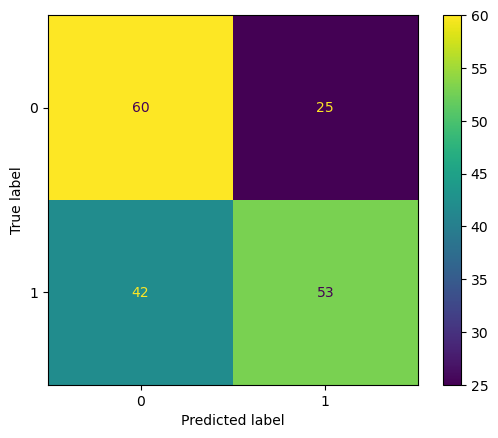

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        97
           1       0.71      0.58      0.64        83

    accuracy                           0.69       180
   macro avg       0.70      0.69      0.69       180
weighted avg       0.70      0.69      0.69       180



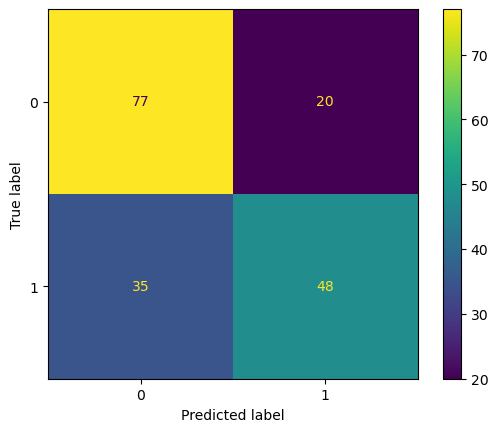

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        94
           1       0.67      0.60      0.63        86

    accuracy                           0.67       180
   macro avg       0.67      0.66      0.66       180
weighted avg       0.67      0.67      0.67       180



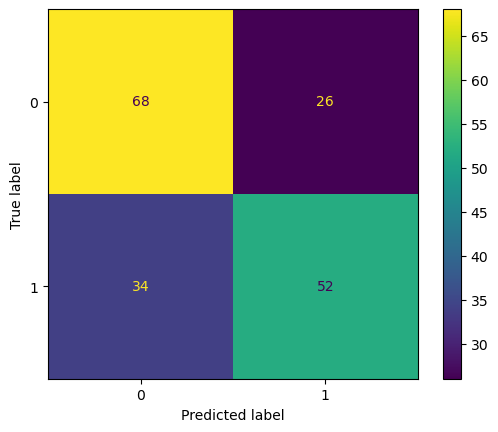

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        95
           1       0.70      0.66      0.68        85

    accuracy                           0.71       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.71      0.71      0.70       180



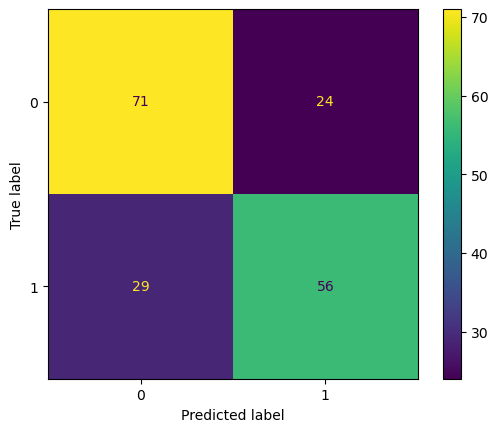

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        92
           1       0.81      0.68      0.74        87

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.76       179



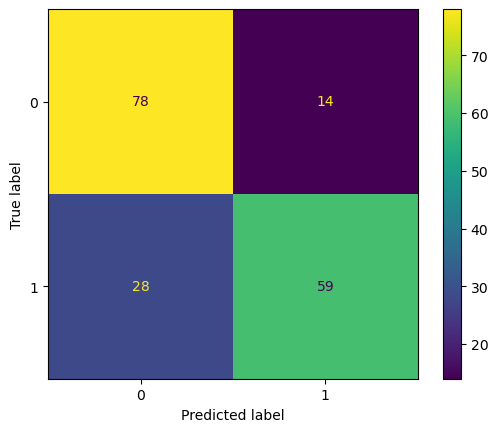

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        94
           1       0.74      0.64      0.68        85

    accuracy                           0.72       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.72      0.72      0.72       179



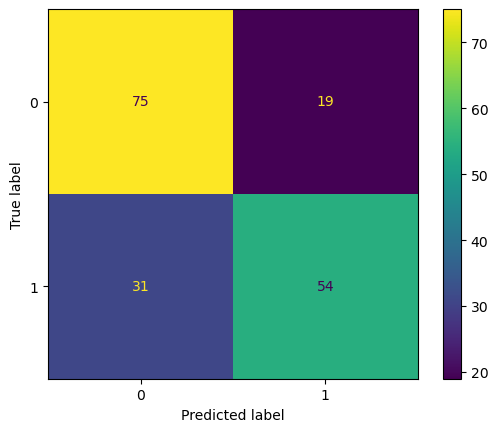

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        87
           1       0.71      0.61      0.65        92

    accuracy                           0.67       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.68      0.67      0.67       179



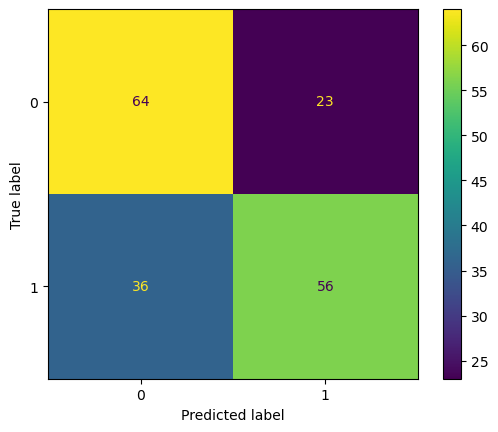

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        93
           1       0.78      0.65      0.71        86

    accuracy                           0.74       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.74      0.74       179



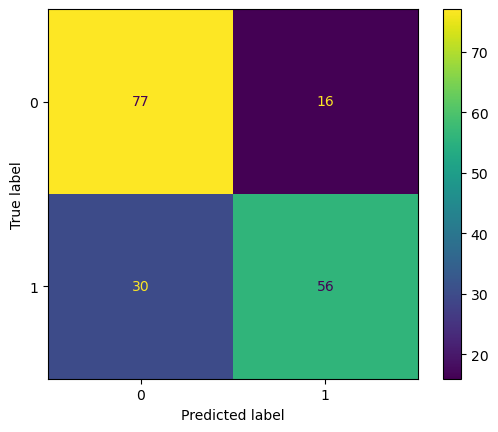

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.59      0.78      0.67        72
           1       0.81      0.64      0.71       107

    accuracy                           0.69       179
   macro avg       0.70      0.71      0.69       179
weighted avg       0.72      0.69      0.70       179



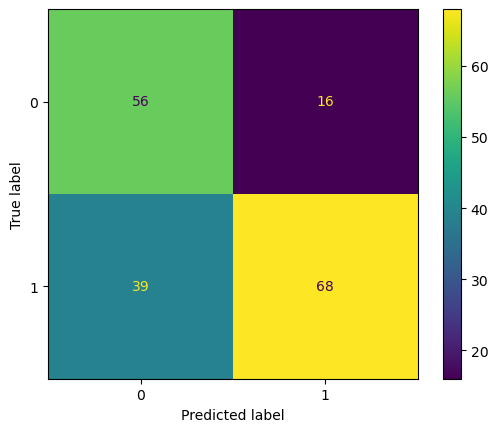

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        91
           1       0.78      0.64      0.70        88

    accuracy                           0.73       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.73      0.73       179



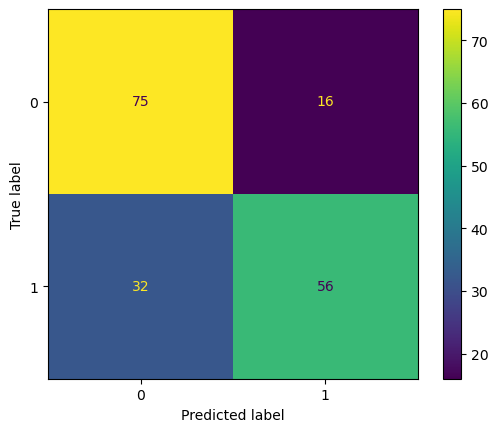

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.67 0.74]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.78 0.62]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.72 0.68]


In [17]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelRF.fit(x_train, y_train)
    predito = modelRF.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelRF)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [18]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.64      0.80      0.72        97
           1       0.76      0.58      0.66       103

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



# RANDOMSEARCHCV + APLICAÇÃO MODELO RANDOM FOREST CRIS

# Define the parameter grid
param_grid = {
    'n_estimators': [30, 60, 90],  # Number of trees in the forest
    'max_depth': [None, 2, 4, 6, 8, 10],  # Maximum depth of the tree
    'min_samples_split': [20, 50, 100],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [10, 20, 40],  # Minimum number of samples required to be at a leaf node
    'criterion':  ['gini', 'entropy','log_loss'],
    'max_features': ['sqrt', 2, 4, 6, 8, 10]
}

# Perform grid search
grid_search = RandomizedSearchCV(modelRF, param_grid, cv=10)
grid_search.fit(x,  y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

In [19]:
modelRF = RandomForestClassifier(n_estimators = 90, min_samples_split = 100, min_samples_leaf = 20, max_features = 10, max_depth = 10, criterion = 'gini',  random_state=42) 

In [20]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        85
           1       0.74      0.60      0.66        95

    accuracy                           0.68       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.69      0.68      0.68       180



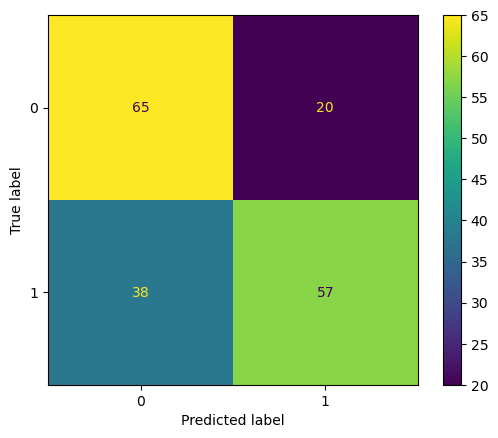

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        97
           1       0.77      0.57      0.65        83

    accuracy                           0.72       180
   macro avg       0.73      0.71      0.71       180
weighted avg       0.73      0.72      0.72       180



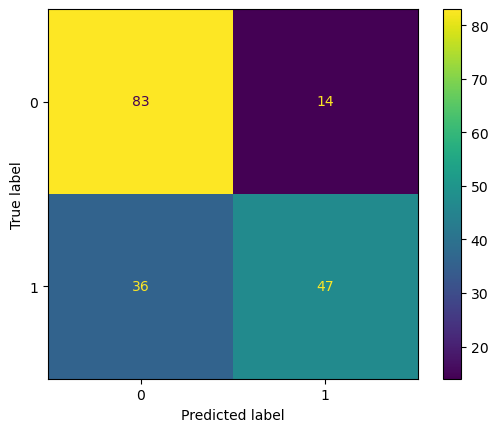

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        94
           1       0.74      0.65      0.69        86

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180



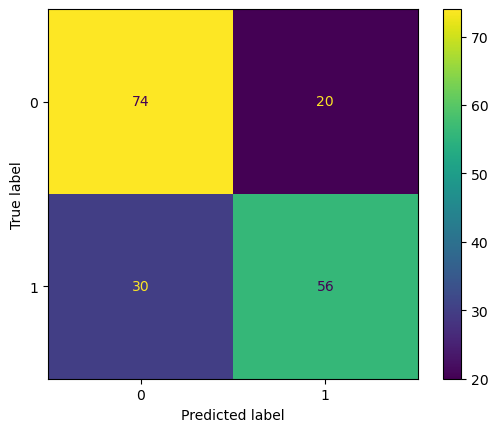

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        95
           1       0.73      0.66      0.69        85

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180



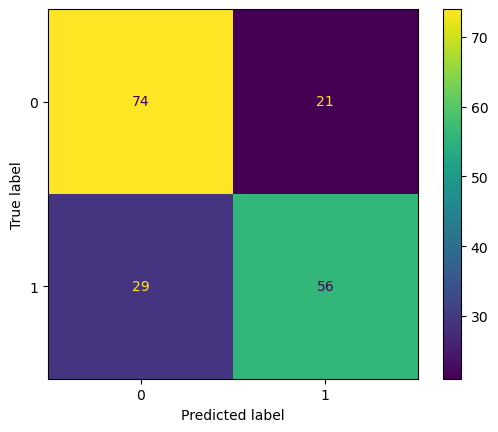

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        92
           1       0.87      0.71      0.78        87

    accuracy                           0.81       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.81      0.81       179



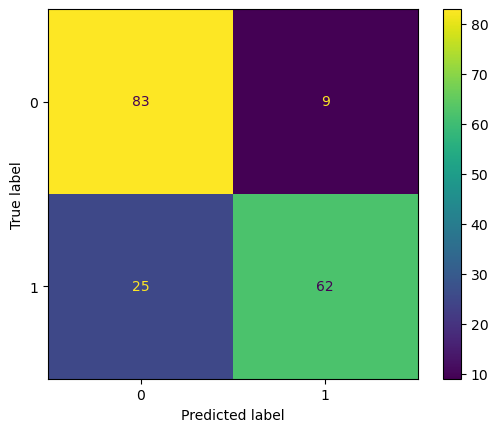

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.72      0.86      0.79        94
           1       0.81      0.64      0.71        85

    accuracy                           0.75       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



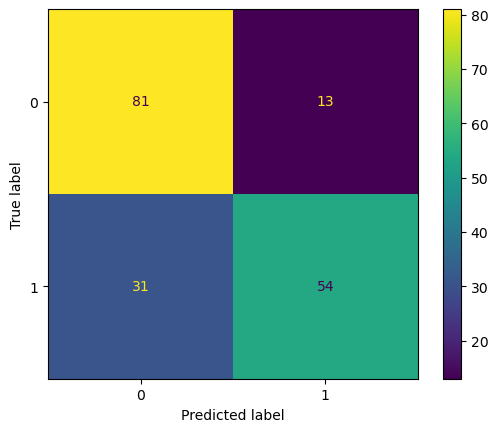

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        87
           1       0.79      0.57      0.66        92

    accuracy                           0.70       179
   macro avg       0.72      0.70      0.69       179
weighted avg       0.72      0.70      0.69       179



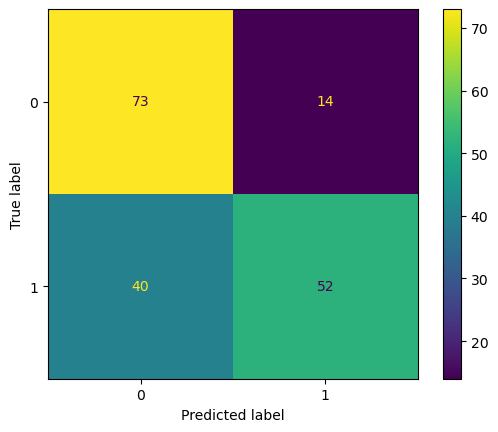

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        93
           1       0.80      0.64      0.71        86

    accuracy                           0.75       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



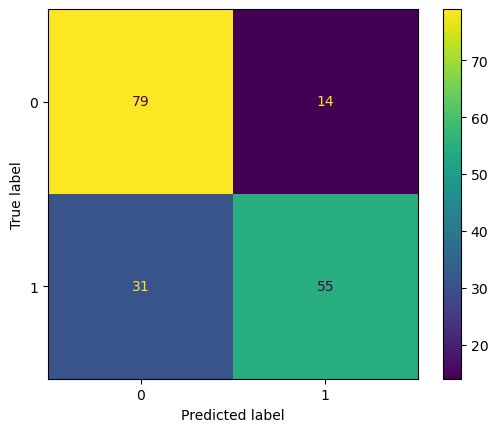

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        72
           1       0.84      0.64      0.72       107

    accuracy                           0.71       179
   macro avg       0.72      0.73      0.71       179
weighted avg       0.74      0.71      0.71       179



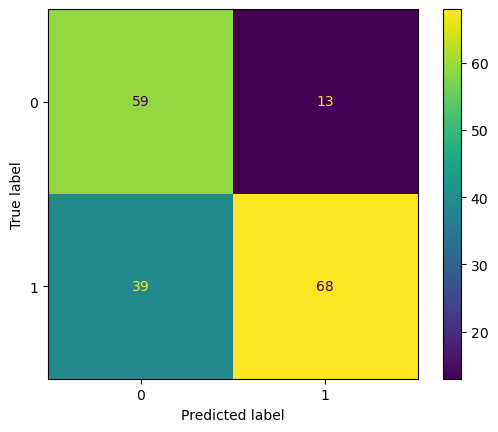

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        91
           1       0.80      0.62      0.70        88

    accuracy                           0.74       179
   macro avg       0.75      0.74      0.73       179
weighted avg       0.75      0.74      0.73       179



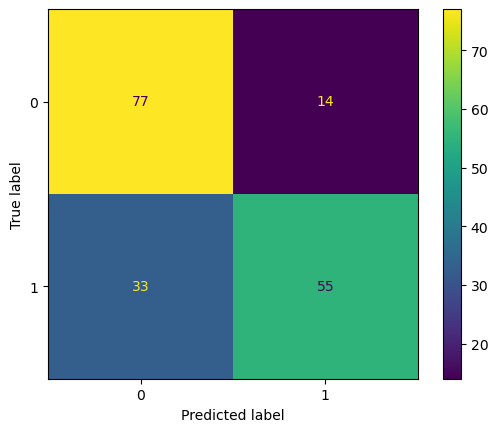

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.69 0.79]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.83 0.63]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.75 0.7 ]


In [21]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelRF.fit(x_train, y_train)
    predito = modelRF.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelRF)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

    Houve melhora no modelo

In [22]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72        97
           1       0.77      0.60      0.67       103

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [5]:
#Function for calculating confidence interval from cross-validation
def interval_confidence(values):
    return st.t.interval(confidence=0.95, df=len(values)-1, loc=np.mean(values), scale=st.sem(values))

In [3]:
RFFmeasureInferior  = (0.66,0.65,0.69,0.69,0.78,0.71,0.66,0.71,0.72,0.70)
RFFmeasureSuperior =  (0.69,0.77,0.75,0.75,0.83,0.79,0.73,0.78,0.69,0.77)

In [6]:
IntervaloFmeasureInferior = interval_confidence(RFFmeasureInferior)
IntervaloFmeasureSuperior = interval_confidence(RFFmeasureSuperior)
print(IntervaloFmeasureInferior)
print(IntervaloFmeasureSuperior)

(0.6700116654993463, 0.7239883345006538)
(0.7238639360149264, 0.7861360639850734)


## Importância dos atributos no modelo de Random Forest

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

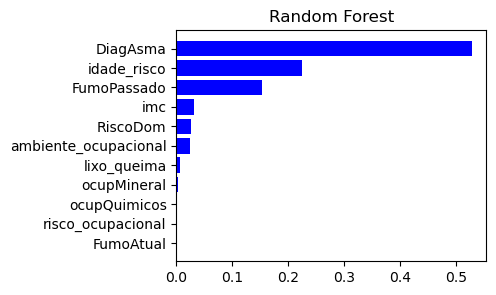

In [23]:
# Get feature importances
importances = modelRF.feature_importances_

# Get feature names
feature_names = DPOC.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::]

# Plot feature importances
plt.figure(figsize=(4, 3))
plt.title("Random Forest")
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), feature_names[indices], rotation=360)
plt.xlabel()
plt.ylabel()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()

# DECISION TREE

undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [25]:
modelDT = DecisionTreeClassifier(random_state = 42)

In [26]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.57      0.66      0.61        85
           1       0.64      0.55      0.59        95

    accuracy                           0.60       180
   macro avg       0.60      0.60      0.60       180
weighted avg       0.61      0.60      0.60       180



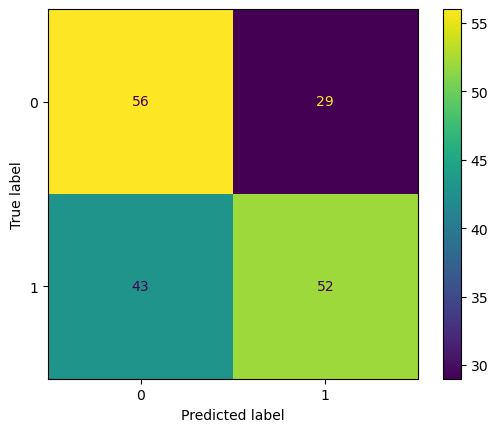

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        97
           1       0.66      0.59      0.62        83

    accuracy                           0.67       180
   macro avg       0.67      0.67      0.67       180
weighted avg       0.67      0.67      0.67       180



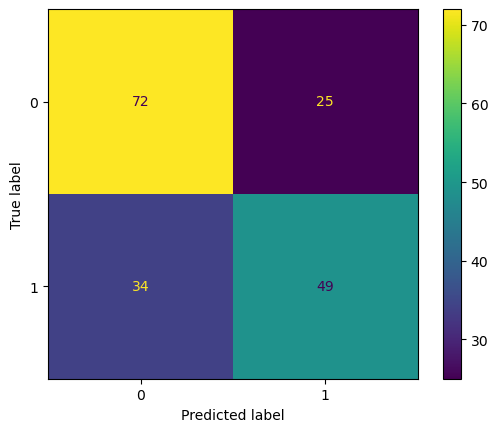

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.66      0.67      0.66        94
           1       0.63      0.62      0.62        86

    accuracy                           0.64       180
   macro avg       0.64      0.64      0.64       180
weighted avg       0.64      0.64      0.64       180



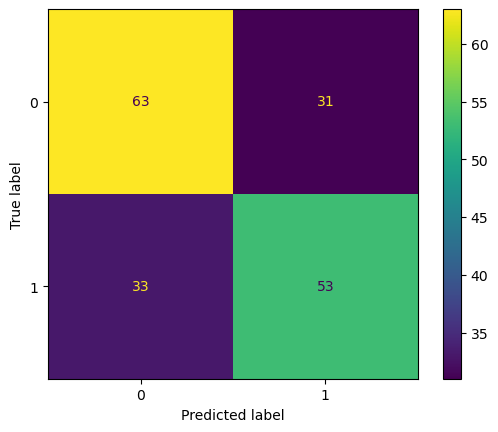

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        95
           1       0.68      0.65      0.66        85

    accuracy                           0.69       180
   macro avg       0.69      0.69      0.69       180
weighted avg       0.69      0.69      0.69       180



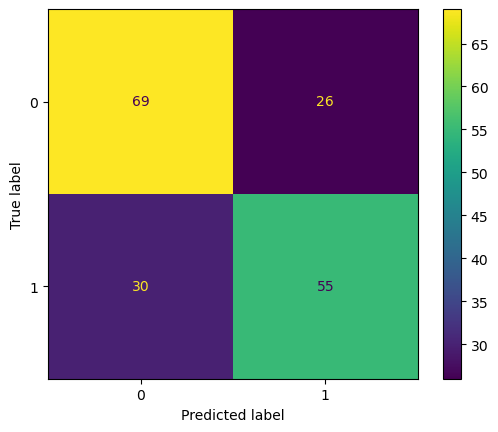

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.68      0.87      0.77        92
           1       0.81      0.57      0.67        87

    accuracy                           0.73       179
   macro avg       0.75      0.72      0.72       179
weighted avg       0.74      0.73      0.72       179



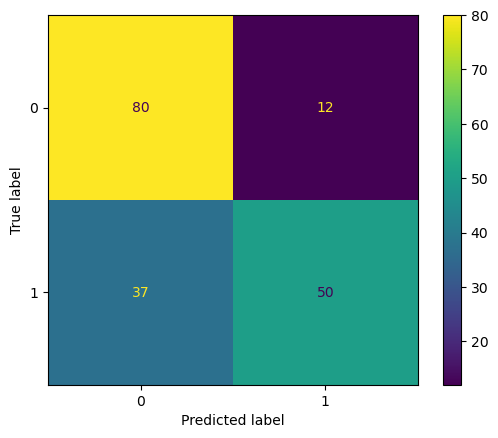

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        94
           1       0.64      0.65      0.64        85

    accuracy                           0.66       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.66      0.66      0.66       179



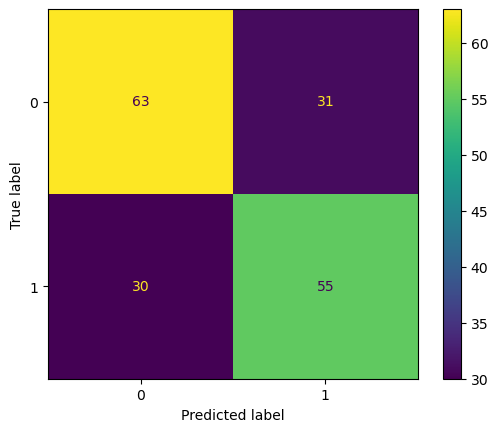

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        87
           1       0.65      0.60      0.62        92

    accuracy                           0.63       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.63      0.63      0.63       179



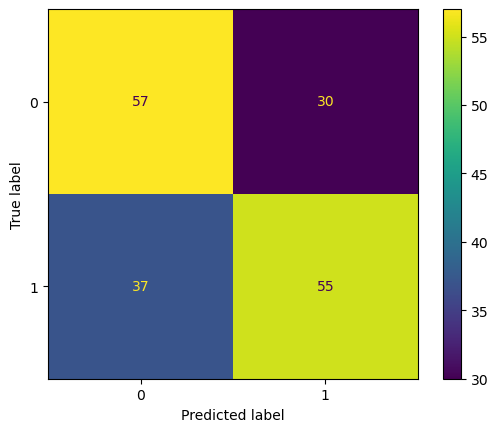

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        93
           1       0.75      0.65      0.70        86

    accuracy                           0.73       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.73      0.73      0.72       179



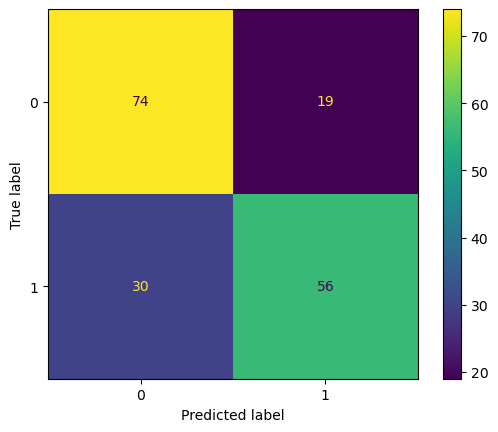

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.55      0.72      0.62        72
           1       0.76      0.60      0.67       107

    accuracy                           0.65       179
   macro avg       0.65      0.66      0.65       179
weighted avg       0.68      0.65      0.65       179



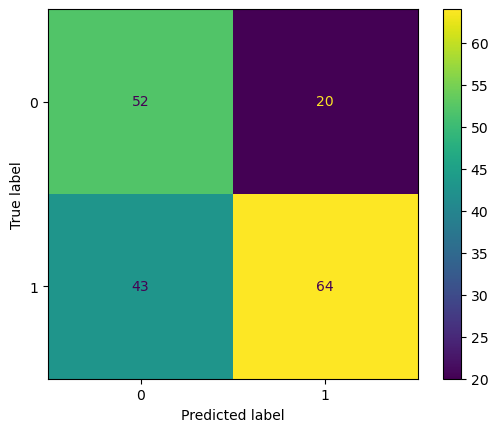

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.61      0.73      0.66        91
           1       0.65      0.52      0.58        88

    accuracy                           0.63       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.63      0.63      0.62       179



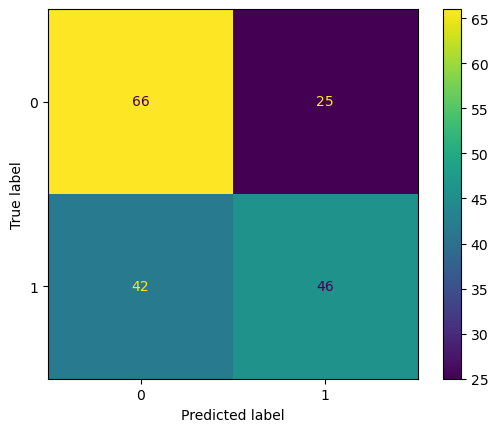

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.64 0.69]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.72 0.6 ]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.68 0.64]


In [27]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelDT.fit(x_train, y_train)
    predito = modelDT.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelDT)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [28]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        97
           1       0.75      0.59      0.66       103

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



## APLICAÇÃO DO DT COM PARAMETROS DO GRIDSEARCH

# Define the parameter grid
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],  # Maximum depth of the tree
    'min_samples_split': [20, 50, 100],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [10, 20, 40],  # Minimum number of samples required to be at a leaf node
    'criterion':  ['gini', 'entropy','log_loss'],
    'max_features': ['sqrt', 2, 4, 6, 8, 10]
}

# Perform grid search
grid_search = RandomizedSearchCV(modelDT, param_grid, cv=10)
grid_search.fit(x,  y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

In [29]:
modelDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 20, min_samples_split = 50, max_features = 10 )

In [30]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        85
           1       0.70      0.65      0.68        95

    accuracy                           0.67       180
   macro avg       0.67      0.67      0.67       180
weighted avg       0.67      0.67      0.67       180



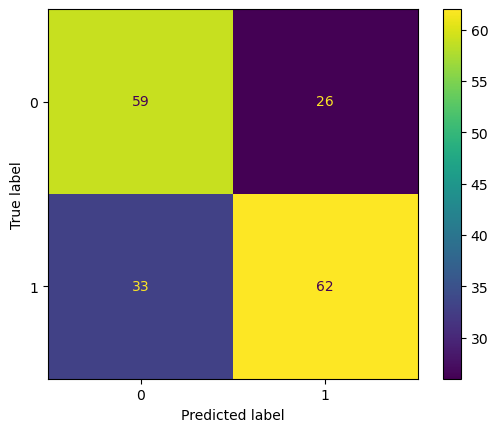

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        97
           1       0.71      0.59      0.64        83

    accuracy                           0.70       180
   macro avg       0.70      0.69      0.69       180
weighted avg       0.70      0.70      0.70       180



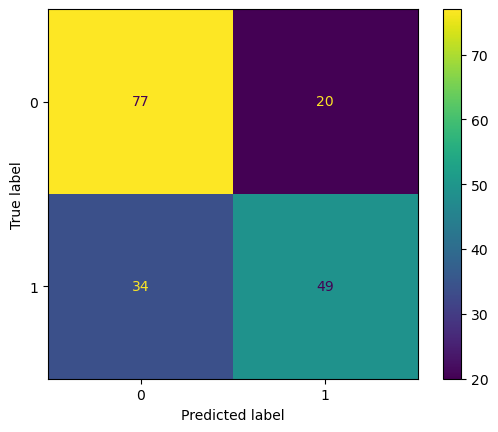

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        94
           1       0.69      0.69      0.69        86

    accuracy                           0.71       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.71      0.71      0.71       180



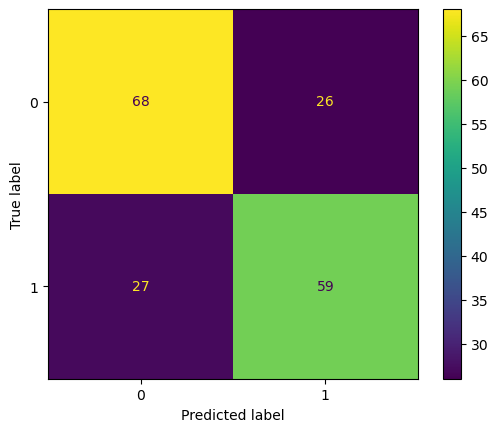

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        95
           1       0.70      0.73      0.71        85

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180



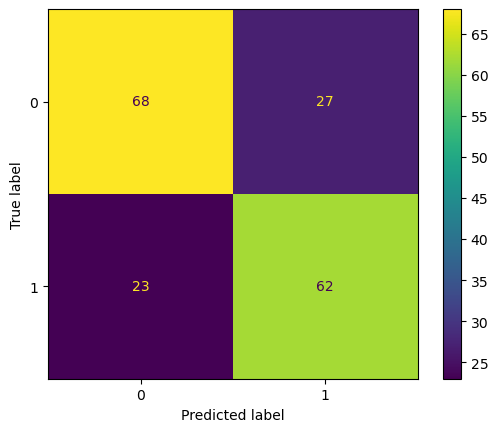

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        92
           1       0.83      0.72      0.77        87

    accuracy                           0.79       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



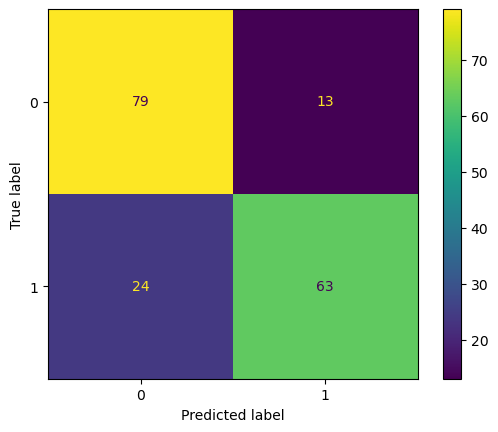

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        94
           1       0.77      0.69      0.73        85

    accuracy                           0.75       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



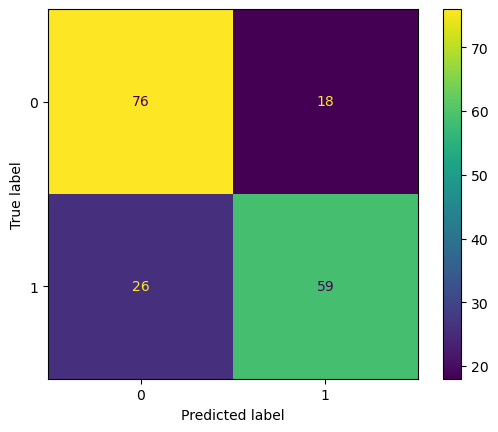

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        87
           1       0.72      0.59      0.65        92

    accuracy                           0.67       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.68      0.67      0.67       179



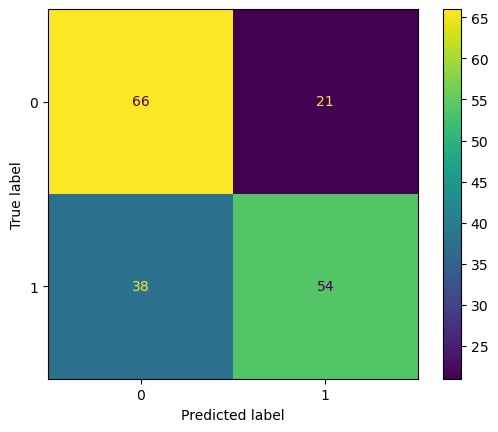

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        93
           1       0.80      0.65      0.72        86

    accuracy                           0.75       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



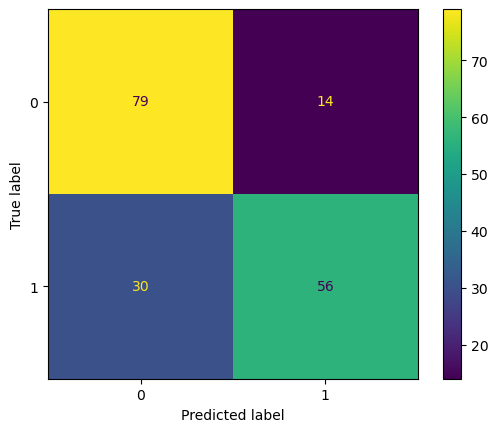

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        72
           1       0.84      0.64      0.72       107

    accuracy                           0.71       179
   macro avg       0.72      0.73      0.71       179
weighted avg       0.74      0.71      0.71       179



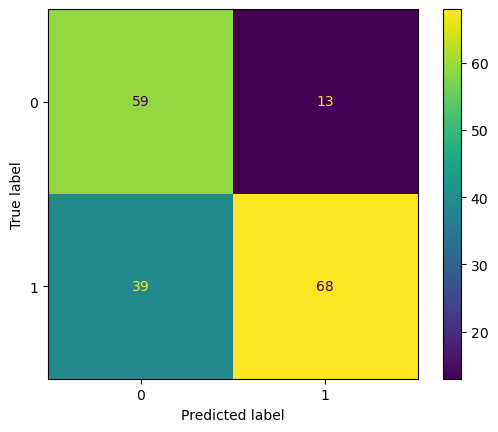

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        91
           1       0.79      0.66      0.72        88

    accuracy                           0.75       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



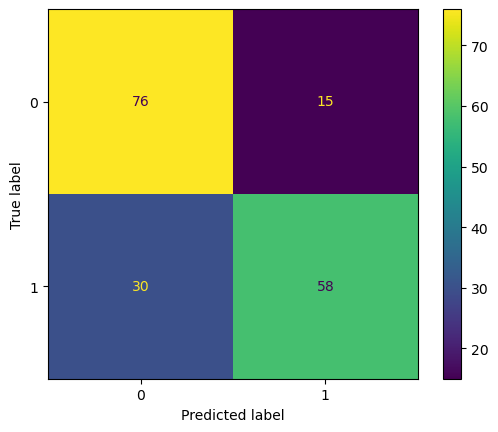

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.7  0.76]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.79 0.66]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.74 0.7 ]


In [31]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelDT.fit(x_train, y_train)
    predito = modelDT.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelDT)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [32]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        97
           1       0.72      0.62      0.67       103

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



In [7]:
ADFmeasureInferior  = (0.68,0.64,0.69,0.71,0.77,0.73,0.65,0.72,0.72,0.72)
ADFmeasureSuperior =  (0.67,0.74,0.72,0.73,0.81,0.78,0.69,0.78,0.69,0.77)

In [8]:
IntervaloFmeasureInferior = interval_confidence(ADFmeasureInferior)
IntervaloFmeasureSuperior = interval_confidence(ADFmeasureSuperior)
print(IntervaloFmeasureInferior)
print(IntervaloFmeasureSuperior)

(0.6751817002788375, 0.7308182997211624)
(0.7048216949464653, 0.7711783050535345)


F1 score médio na validação das classes Inferior e Superior:  [0.74 0.7 ]

In [33]:
from sklearn.tree import export_text

tree_rules = export_text(modelDT, feature_names=list(x.columns))
print(tree_rules)

|--- DiagAsma <= 0.50
|   |--- idade_risco <= 3.50
|   |   |--- FumoPassado <= 1.50
|   |   |   |--- imc <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- imc >  2.50
|   |   |   |   |--- ambiente_ocupacional <= 0.50
|   |   |   |   |   |--- lixo_queima <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lixo_queima >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ambiente_ocupacional >  0.50
|   |   |   |   |   |--- idade_risco <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- idade_risco >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- FumoPassado >  1.50
|   |   |   |--- idade_risco <= 1.50
|   |   |   |   |--- imc <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- imc >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- idade_risco >  1.50
|   |   |   |   |--- imc <= 3.50
|   |   |   |   |   |--- ambiente_ocupacional <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ambie

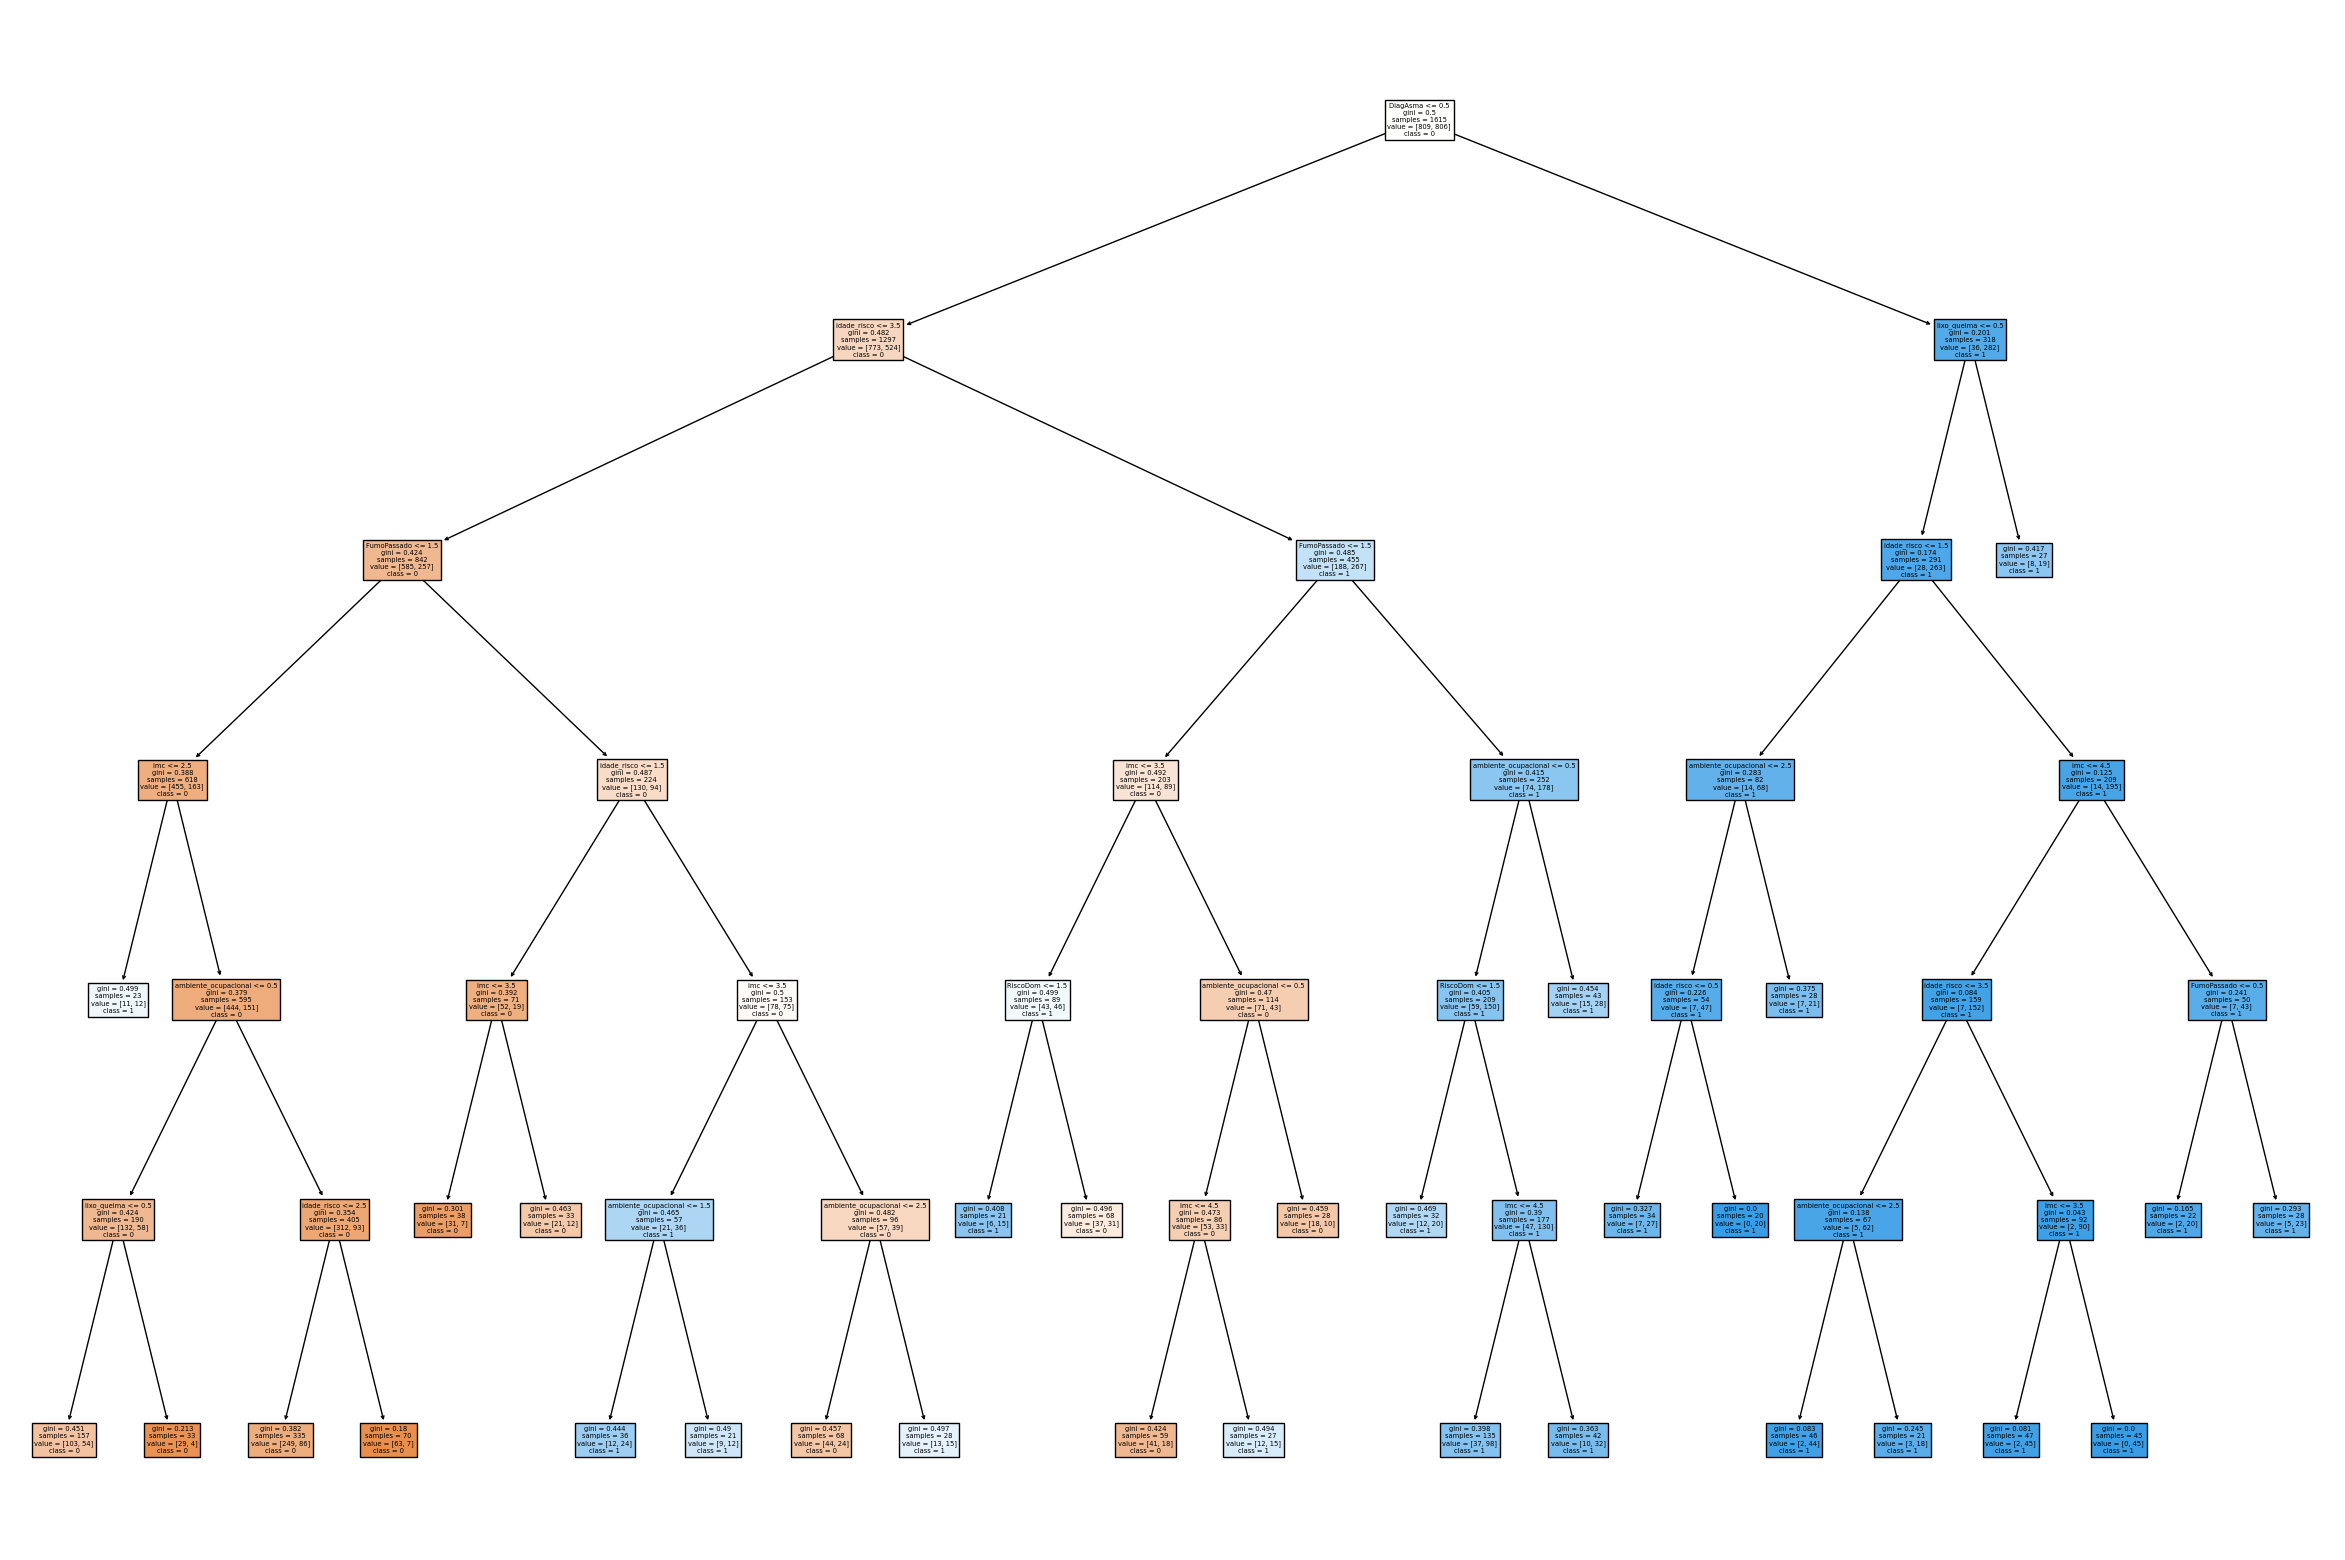

In [34]:
# Convert class labels to string
class_names = [str(label) for label in modelDT.classes_]

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(modelDT, feature_names=list(x.columns), class_names = class_names, filled=True)
plt.show()

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

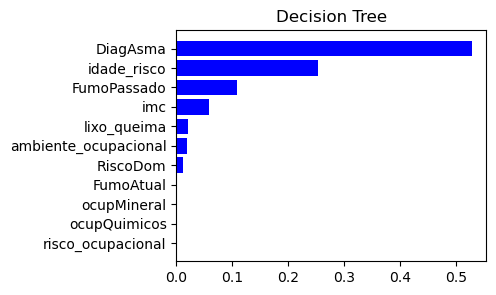

In [35]:
# Get feature importances
importances = modelDT.feature_importances_

# Get feature names
feature_names = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::]

# Plot feature importances
plt.figure(figsize=(4, 3))
plt.title("Decision Tree")
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), feature_names[indices], rotation=360)
plt.xlabel()
plt.ylabel()
plt.tight_layout()
plt.show()

## APLICAÇÃO NAIVE BAYES

undersampler = RandomUnderSampler(random_state=42) X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [36]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
modelNB = GaussianNB()

In [37]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.60      0.65      0.62        85
           1       0.66      0.61      0.63        95

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.63       180
weighted avg       0.63      0.63      0.63       180



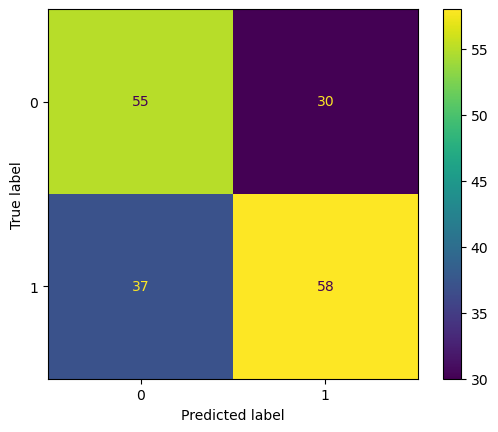

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        97
           1       0.67      0.70      0.69        83

    accuracy                           0.71       180
   macro avg       0.70      0.71      0.70       180
weighted avg       0.71      0.71      0.71       180



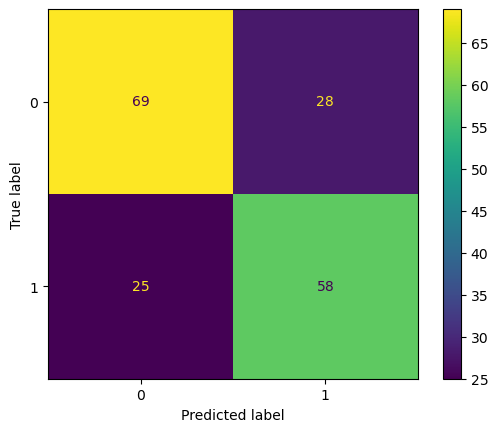

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.70      0.69      0.70        94
           1       0.67      0.67      0.67        86

    accuracy                           0.68       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.68      0.68      0.68       180



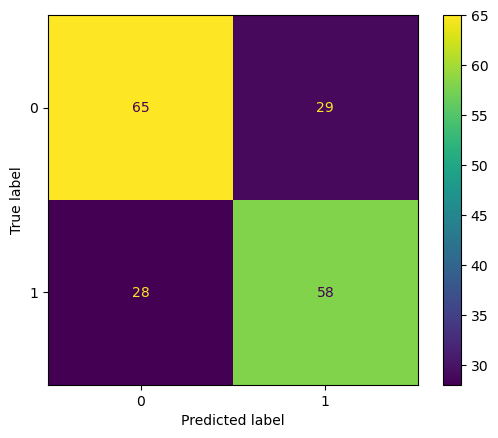

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        95
           1       0.68      0.67      0.67        85

    accuracy                           0.69       180
   macro avg       0.69      0.69      0.69       180
weighted avg       0.69      0.69      0.69       180



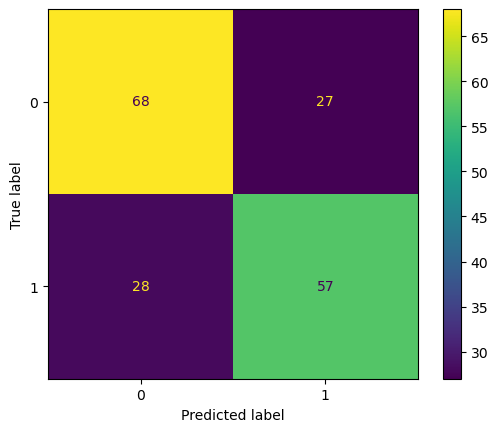

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        92
           1       0.71      0.64      0.67        87

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.70      0.70      0.70       179



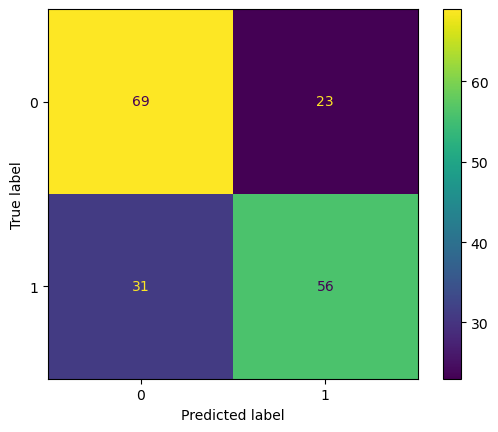

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        94
           1       0.77      0.72      0.74        85

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.76       179



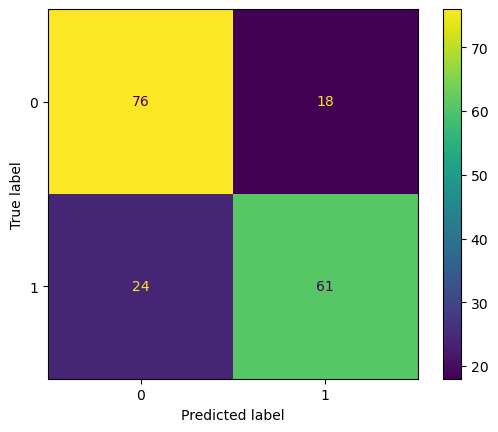

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.61      0.80      0.70        87
           1       0.74      0.52      0.61        92

    accuracy                           0.66       179
   macro avg       0.68      0.66      0.65       179
weighted avg       0.68      0.66      0.65       179



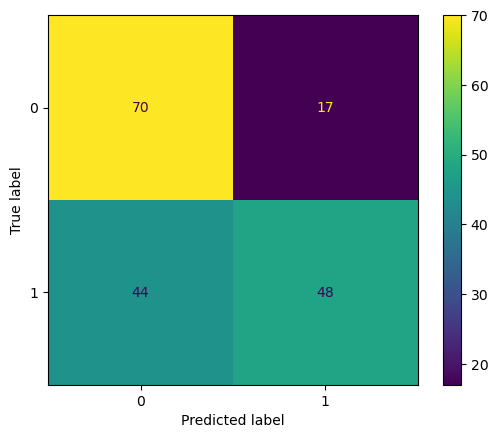

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        93
           1       0.65      0.64      0.65        86

    accuracy                           0.66       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.66      0.66      0.66       179



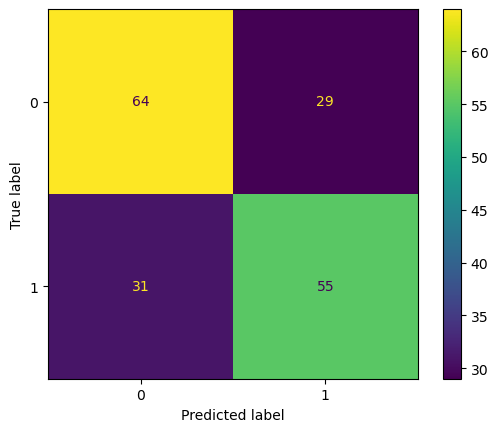

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.59      0.79      0.67        72
           1       0.82      0.63      0.71       107

    accuracy                           0.69       179
   macro avg       0.70      0.71      0.69       179
weighted avg       0.72      0.69      0.70       179



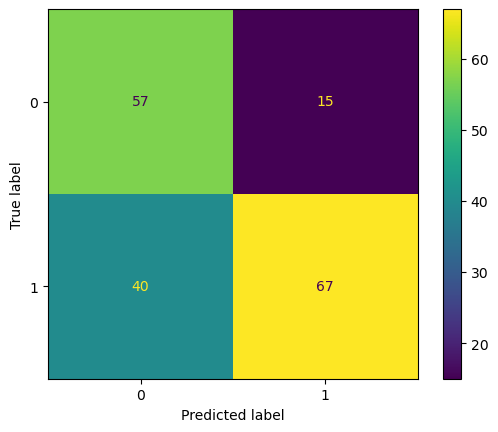

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        91
           1       0.72      0.72      0.72        88

    accuracy                           0.72       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.72      0.72      0.72       179



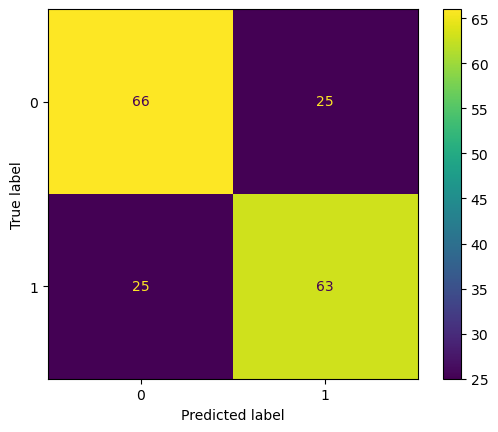

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.68 0.71]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.73 0.65]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.7  0.68]


In [38]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelNB.fit(x_train, y_train)
    predito = modelNB.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelNB)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [39]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        97
           1       0.77      0.73      0.75       103

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200



In [9]:
NBFmeasureInferior  = (0.63,0.69,0.67,0.67,0.67,0.74,0.61,0.65,0.71,0.72)
NBFmeasureSuperior =  (0.62,0.72,0.70,0.71,0.72,0.78,0.70,0.68,0.67,0.73)

In [10]:
IntervaloFmeasureInferior = interval_confidence(NBFmeasureInferior)
IntervaloFmeasureSuperior = interval_confidence(NBFmeasureSuperior)
print(IntervaloFmeasureInferior)
print(IntervaloFmeasureSuperior)

(0.6471482568168293, 0.7048517431831706)
(0.6730175267850722, 0.7329824732149277)


## APLICAÇÃO ADABOOST

undersampler = RandomUnderSampler(random_state=42) X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
modelADA = AdaBoostClassifier(random_state=42)

In [41]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        85
           1       0.66      0.63      0.65        95

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.63       180
weighted avg       0.63      0.63      0.63       180



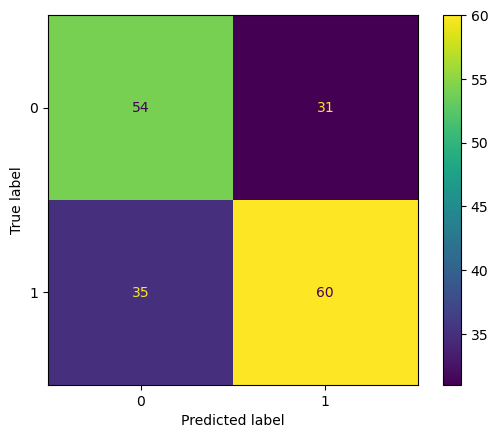

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        97
           1       0.72      0.57      0.64        83

    accuracy                           0.70       180
   macro avg       0.71      0.69      0.69       180
weighted avg       0.70      0.70      0.69       180



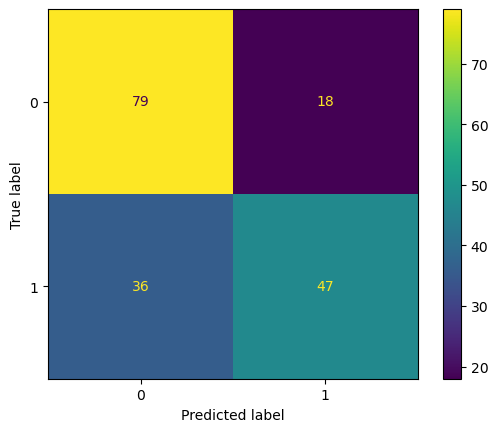

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.67      0.68      0.68        94
           1       0.65      0.64      0.64        86

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.66      0.66      0.66       180



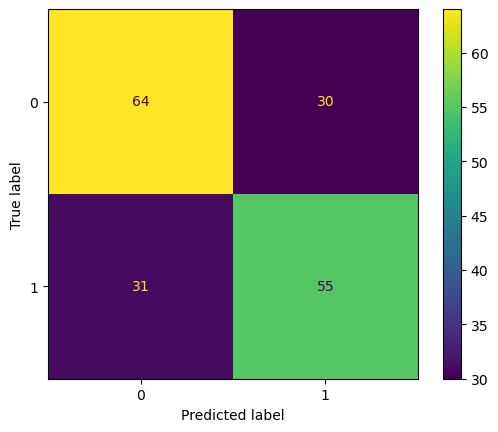

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        95
           1       0.69      0.66      0.67        85

    accuracy                           0.70       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.70      0.70      0.70       180



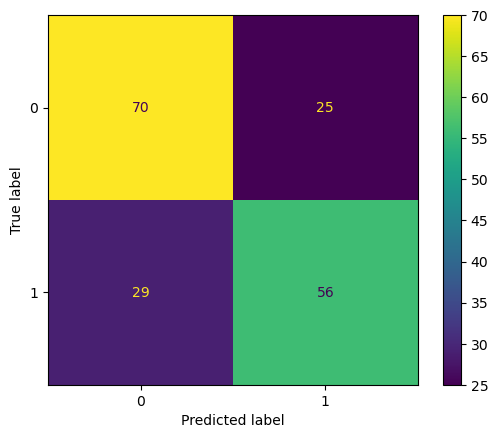

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        92
           1       0.76      0.68      0.72        87

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



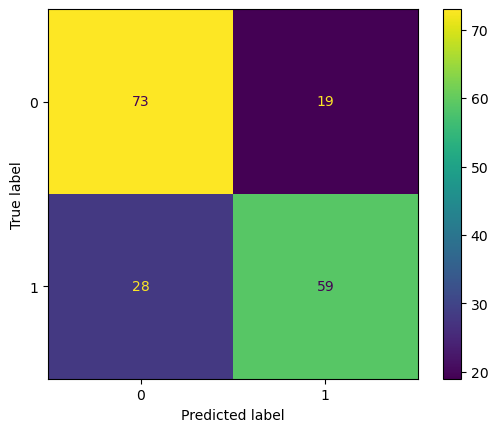

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        94
           1       0.73      0.64      0.68        85

    accuracy                           0.72       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.72      0.71       179



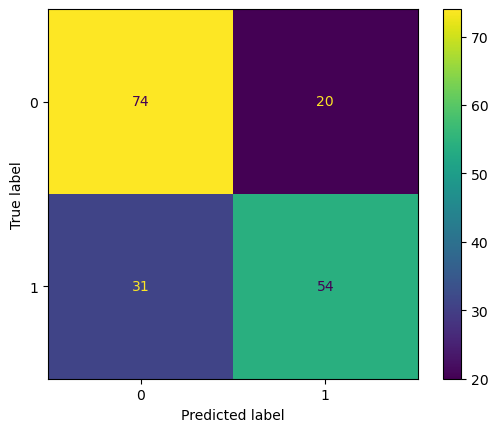

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        87
           1       0.74      0.62      0.67        92

    accuracy                           0.69       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.70      0.69      0.69       179



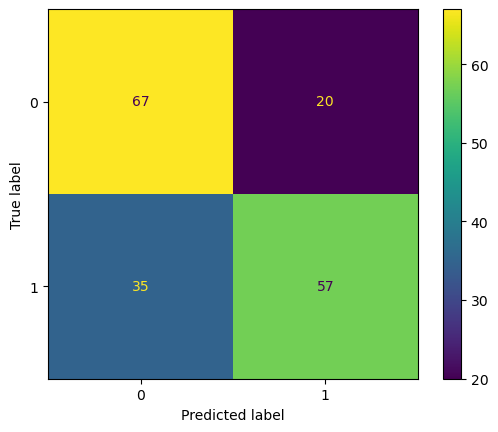

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        93
           1       0.71      0.63      0.67        86

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.70      0.70      0.70       179



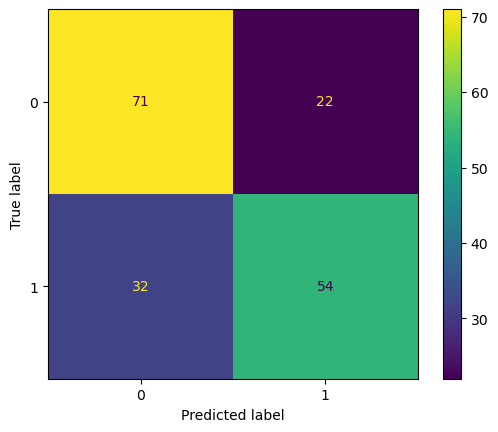

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.62      0.75      0.68        72
           1       0.80      0.69      0.74       107

    accuracy                           0.72       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.73      0.72      0.72       179



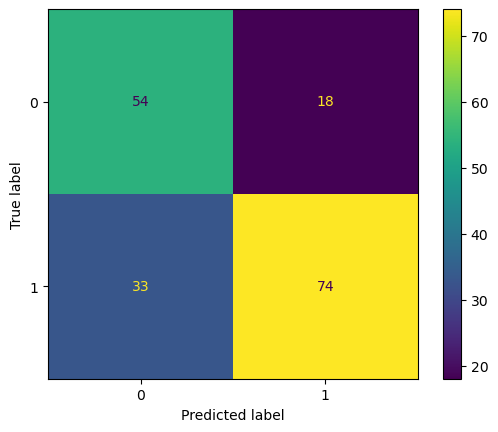

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        91
           1       0.76      0.70      0.73        88

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



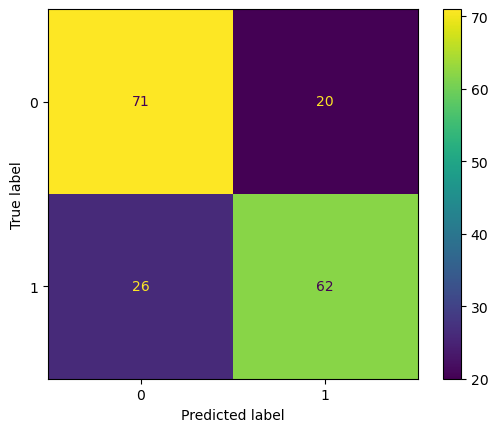

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.68 0.72]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.75 0.65]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.71 0.68]


In [42]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelADA.fit(x_train, y_train)
    predito = modelADA.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelADA)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [43]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        97
           1       0.74      0.68      0.71       103

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



## AdaBoost + GridSearch

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [30, 60, 90],  # Number of weak learners
    'learning_rate': [0.1, 0.3, 0.6, 1.0]  # Learning rate
}

# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(modelADA, param_grid, cv=10)
grid_search.fit(x, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


In [44]:
modelADA = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 60, random_state=42)

FOLD: 1
              precision    recall  f1-score   support

           0       0.60      0.79      0.68        85
           1       0.74      0.54      0.62        95

    accuracy                           0.66       180
   macro avg       0.67      0.66      0.65       180
weighted avg       0.68      0.66      0.65       180



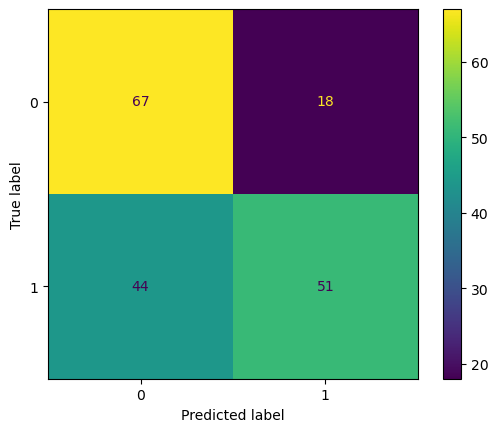

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        97
           1       0.86      0.52      0.65        83

    accuracy                           0.74       180
   macro avg       0.78      0.72      0.72       180
weighted avg       0.77      0.74      0.73       180



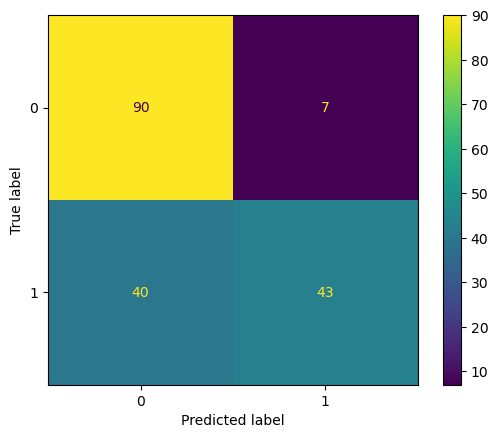

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        94
           1       0.71      0.58      0.64        86

    accuracy                           0.69       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.69      0.69      0.69       180



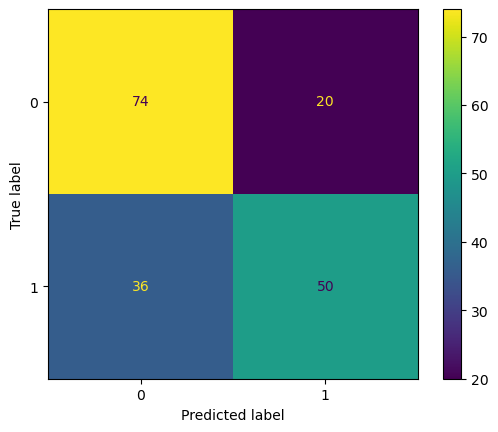

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.72      0.73      0.72        95
           1       0.69      0.68      0.69        85

    accuracy                           0.71       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.71      0.71      0.71       180



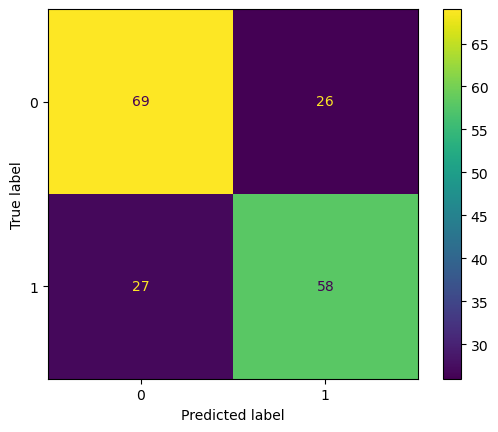

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        92
           1       0.85      0.64      0.73        87

    accuracy                           0.77       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.77      0.77       179



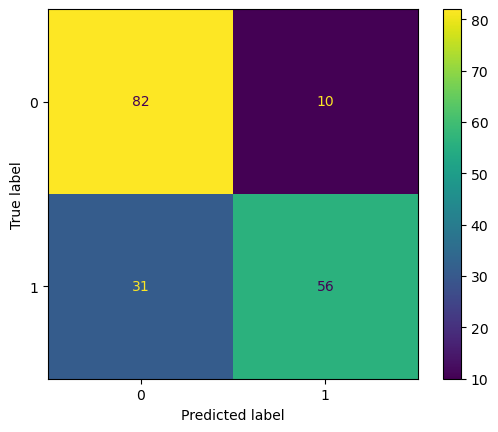

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        94
           1       0.82      0.60      0.69        85

    accuracy                           0.75       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.76      0.75      0.74       179



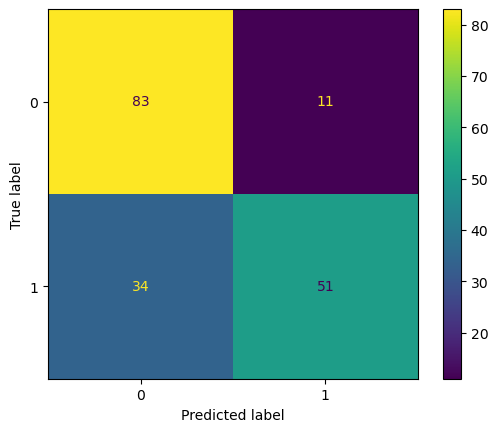

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.64      0.87      0.74        87
           1       0.82      0.53      0.64        92

    accuracy                           0.70       179
   macro avg       0.73      0.70      0.69       179
weighted avg       0.73      0.70      0.69       179



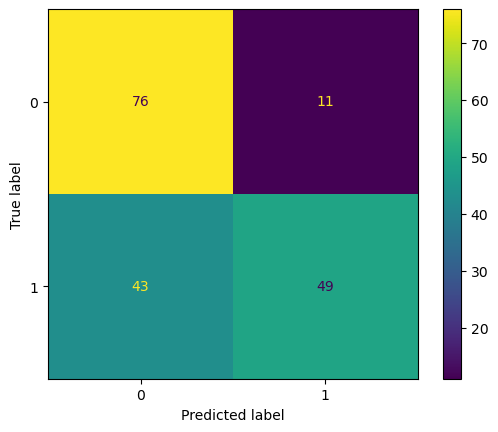

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        93
           1       0.84      0.56      0.67        86

    accuracy                           0.74       179
   macro avg       0.77      0.73      0.73       179
weighted avg       0.76      0.74      0.73       179



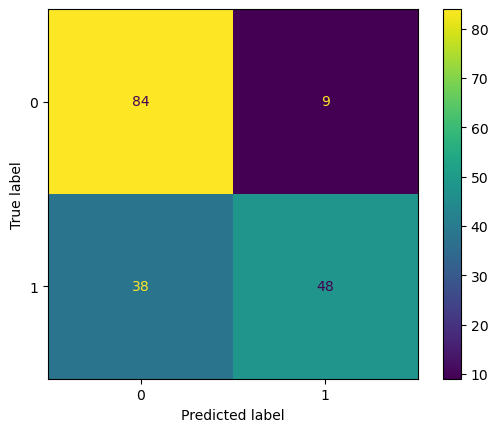

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.60      0.85      0.71        72
           1       0.86      0.63      0.72       107

    accuracy                           0.72       179
   macro avg       0.73      0.74      0.71       179
weighted avg       0.76      0.72      0.72       179



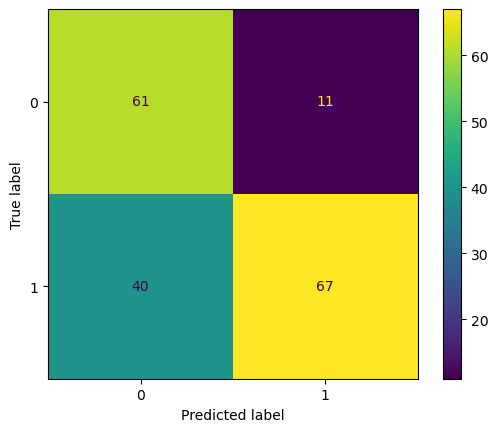

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        91
           1       0.86      0.57      0.68        88

    accuracy                           0.74       179
   macro avg       0.77      0.74      0.73       179
weighted avg       0.77      0.74      0.73       179



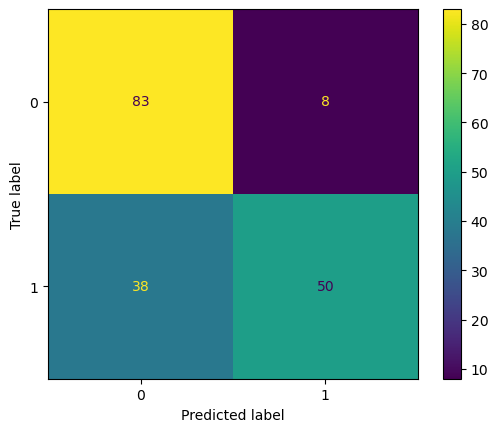

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.67 0.81]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.85 0.58]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.75 0.67]


In [45]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modelADA.fit(x_train, y_train)
    predito = modelADA.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modelADA)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [46]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73        97
           1       0.79      0.57      0.66       103

    accuracy                           0.70       200
   macro avg       0.72      0.70      0.70       200
weighted avg       0.72      0.70      0.70       200



In [11]:
ADAFmeasureInferior  = (0.62,0.65,0.64,0.69,0.73,0.69,0.64,0.67,0.72,0.68)
ADAFmeasureSuperior =  (0.68,0.79,0.73,0.72,0.80,0.79,0.74,0.78,0.71,0.78)

In [12]:
IntervaloFmeasureInferior = interval_confidence(ADAFmeasureInferior)
IntervaloFmeasureSuperior = interval_confidence(ADAFmeasureSuperior)
print(IntervaloFmeasureInferior)
print(IntervaloFmeasureSuperior)

(0.6473068336179966, 0.6986931663820033)
(0.722447302577613, 0.781552697422387)


## Importância dos Atributos no Modelo

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

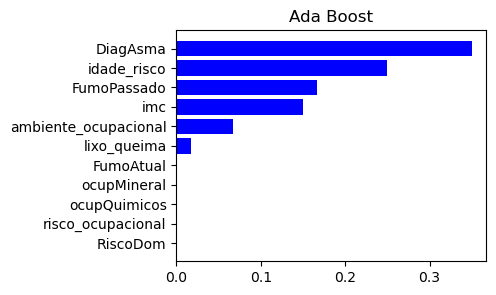

In [47]:
# Get feature importances
importances = modelADA.feature_importances_

# Get feature names
feature_names = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::]

# Plot feature importances
plt.figure(figsize=(4, 3))
plt.title("Ada Boost")
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), feature_names[indices], rotation=360)
plt.xlabel()
plt.ylabel()
plt.tight_layout()
plt.show()

## Aplicação Rede Neural

In [48]:
#Normalização
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(x)  
x = scaler.transform(x)  
# apply same transformation to test data
x_test = scaler.transform(x_test)  

In [49]:
from sklearn.neural_network import MLPClassifier
modeloNN = MLPClassifier(hidden_layer_sizes=(25,), solver='adam', activation = 'logistic', random_state=42)

FOLD: 1
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        85
           1       0.70      0.62      0.66        95

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.67      0.66      0.66       180



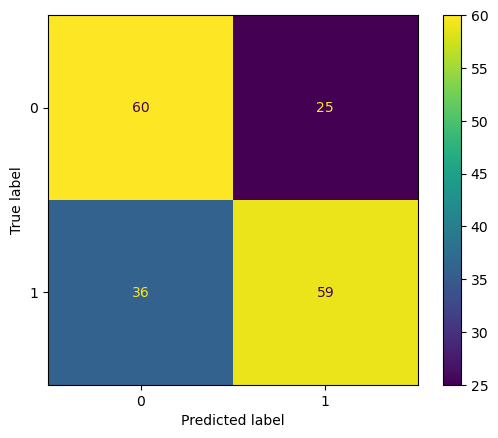

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        97
           1       0.70      0.58      0.63        83

    accuracy                           0.69       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.69      0.69      0.69       180



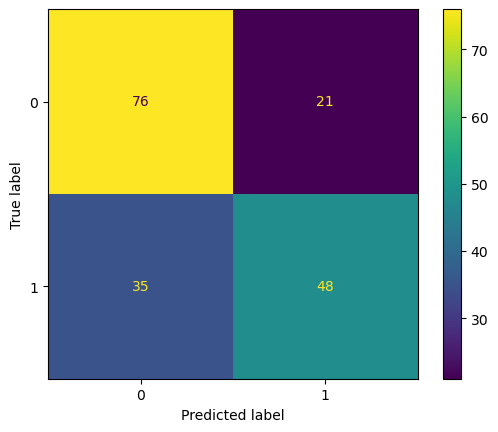

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        94
           1       0.71      0.70      0.70        86

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180



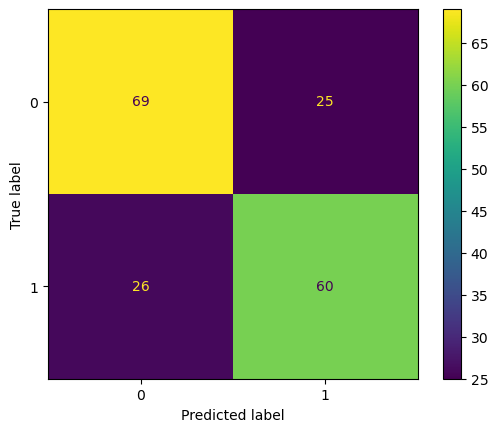

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        95
           1       0.72      0.65      0.68        85

    accuracy                           0.72       180
   macro avg       0.72      0.71      0.71       180
weighted avg       0.72      0.72      0.72       180



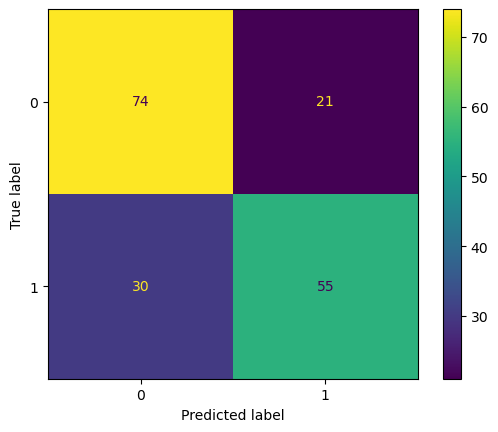

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        92
           1       0.81      0.69      0.75        87

    accuracy                           0.77       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



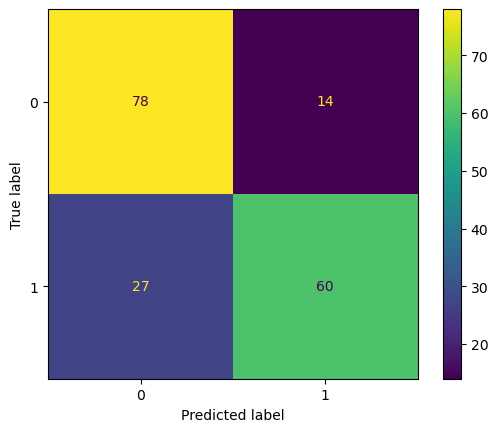

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        94
           1       0.78      0.71      0.74        85

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.76       179



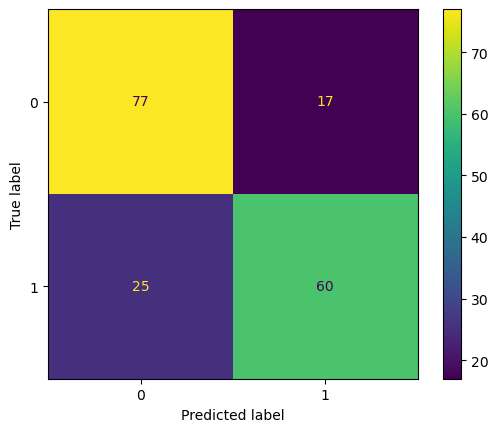

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        87
           1       0.69      0.57      0.62        92

    accuracy                           0.65       179
   macro avg       0.65      0.65      0.65       179
weighted avg       0.66      0.65      0.65       179



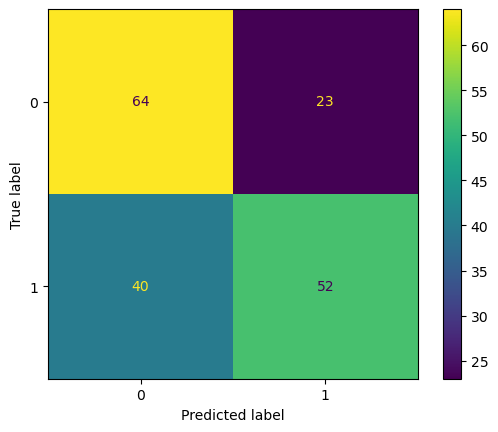

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        93
           1       0.78      0.69      0.73        86

    accuracy                           0.75       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



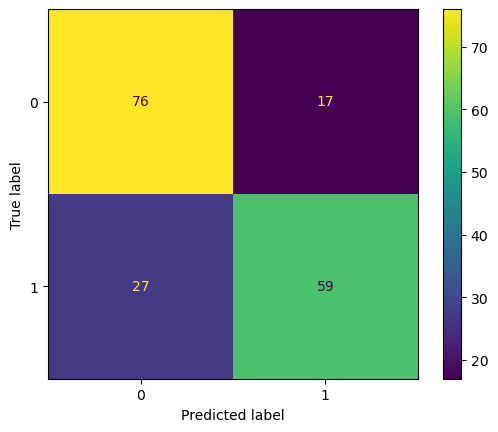

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.61      0.83      0.71        72
           1       0.85      0.64      0.73       107

    accuracy                           0.72       179
   macro avg       0.73      0.74      0.72       179
weighted avg       0.76      0.72      0.72       179



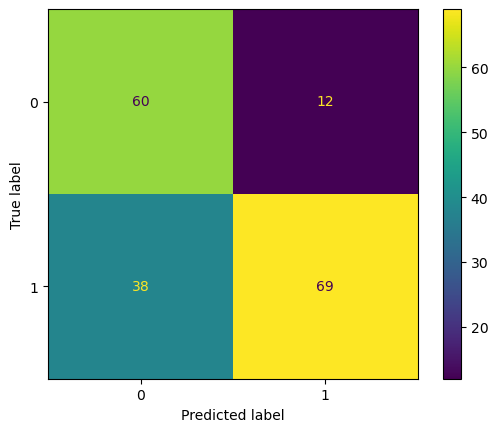

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.68      0.82      0.75        91
           1       0.77      0.60      0.68        88

    accuracy                           0.72       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.72      0.71       179



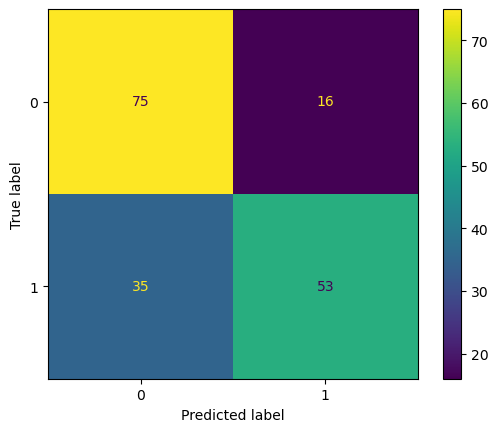

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.69 0.75]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.79 0.64]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.73 0.69]


In [50]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

x = pd.DataFrame(x)

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modeloNN.fit(x_train, y_train)
    predito = modeloNN.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modeloNN)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [51]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        97
           1       0.76      0.63      0.69       103

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



In [13]:
MLPFmeasureInferior  = (0.66,0.63,0.70,0.68,0.75,0.74,0.62,0.73,0.73,0.68)
MLPFmeasureSuperior =  (0.66,0.73,0.73,0.74,0.79,0.79,0.67,0.78,0.71,0.75)

In [15]:
IntervaloFmeasureInferior = interval_confidence(MLPFmeasureInferior)
IntervaloFmeasureSuperior = interval_confidence(MLPFmeasureSuperior)
print(IntervaloFmeasureInferior)
print(IntervaloFmeasureSuperior)

(0.6591662349692153, 0.7248337650307846)
(0.7022616191441697, 0.7677383808558305)


## GridSearch - MLPClassifier - IGNORAR - FOI UTILIZADO KOLGOMOROV

print("Best Hyperparameters:", grid_search.best_params_)

modeloNN = MLPClassifier(activation = 'relu', hidden_layer_sizes = (50, 50), learning_rate = 'constant', solver = 'sgd', max_iter=1000, verbose=True, random_state=42)

melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

x = pd.DataFrame(x)

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    modeloNN.fit(x_train, y_train)
    predito = modeloNN.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(modeloNN)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

# Comparação de resultados

<Figure size 1000x1000 with 0 Axes>

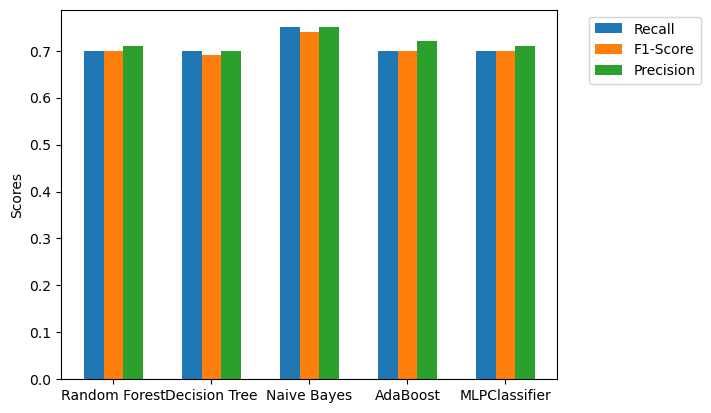

In [56]:
#Valores macro avg que foram utilizados em cada modelo.
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'AdaBoost', 'MLPClassifier']
precision_scores = [0.71 , 0.70, 0.75, 0.72,0.71]
recall_scores = [0.70 ,  0.70,  0.75 , 0.70, 0.70]
f1_scores = [0.70 , 0.69,  0.74 , 0.70, 0.70]

# Create bar plot
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
x = range(len(models))
ax.bar(x, recall_scores, width=0.2, label='Recall')
ax.bar([i+0.2 for i in x], f1_scores, width=0.2, label='F1-Score')
ax.bar([i+0.4 for i in x], precision_scores, width=0.2, label='Precision')
ax.set_xticks([i+0.2 for i in x])
ax.set_xticklabels(models)
ax.set_ylabel('Scores')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.show()